In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")
os.makedirs("plots", exist_ok=True)


In [71]:
df = pd.read_csv("SuperMarket Analysis.csv")

print("First 5 Rows:")
display(df.head())

print("\nInfo:")
df.info()

print("\nDescribe (Numerical):")
display(df.describe())

print("\nMissing Values:")
display(df.isnull().sum())


First 5 Rows:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin perce

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000



Missing Values:


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df["Time"] = pd.to_datetime(df["Time"], format="%I:%M:%S %p").dt.time 

print("Duplicates:")
print(df.duplicated().sum())

df.to_csv("cleaned_supermarket_sales.csv", index=False)
print("Cleaned data saved to cleaned_supermarket_sales.csv")


Duplicates:
0
Cleaned data saved to cleaned_supermarket_sales.csv


In [73]:
df_clean = pd.read_csv("cleaned_supermarket_sales.csv")
df_clean["Date"] = pd.to_datetime(df_clean["Date"])

stats_cols = ["Branch", "Customer type", "Gender", "Payment"]
print("Basic Statistics for Categorical Columns")
for col in stats_cols:
    print(f"\nFrequency for {col}:")
    print(df_clean[col].value_counts())

print("\nNumerical Statistics")
num_cols = ["Sales", "Rating", "gross income"]
display(df_clean[num_cols].agg(["mean", "median", "max", "min"]))


Basic Statistics for Categorical Columns

Frequency for Branch:
Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64

Frequency for Customer type:
Customer type
Member    565
Normal    435
Name: count, dtype: int64

Frequency for Gender:
Gender
Female    571
Male      429
Name: count, dtype: int64

Frequency for Payment:
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

Numerical Statistics


,Sales,Rating,gross income
mean,322.966749,6.9727,15.379369
median,253.848000,7.0000,12.088000
max,1042.650000,10.0000,49.650000
min,10.678500,4.0000,0.508500


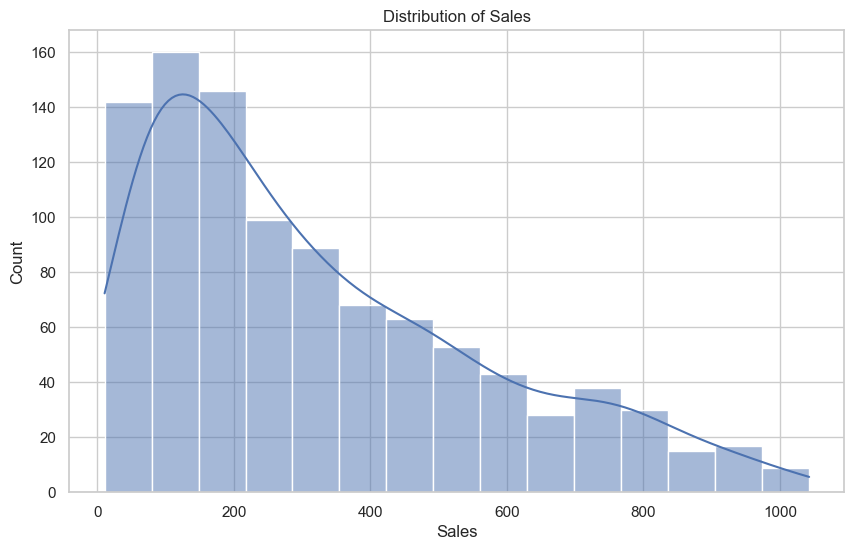

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean["Sales"], kde=True)
plt.title("Distribution of Sales")
plt.savefig("plots/sales_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


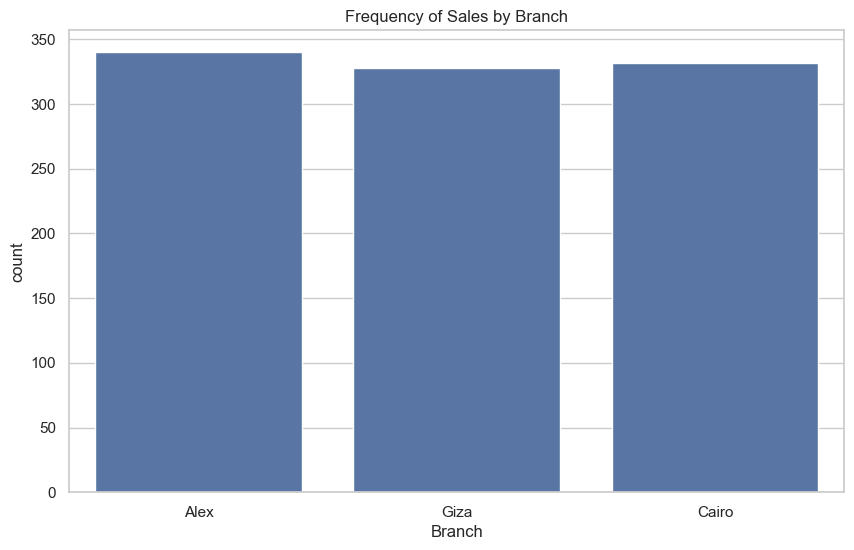

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Branch", data=df_clean)
plt.title("Frequency of Sales by Branch")
plt.savefig("plots/branch_frequency.png", dpi=300, bbox_inches="tight")
plt.show()


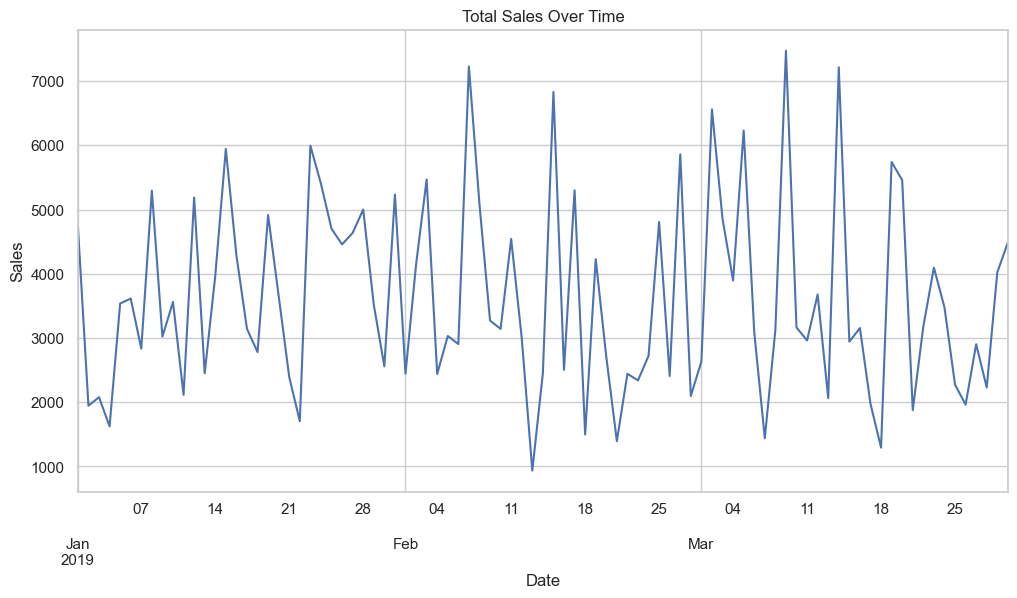

In [76]:
plt.figure(figsize=(12, 6))
df_clean.groupby("Date")["Sales"].sum().plot()
plt.title("Total Sales Over Time")
plt.ylabel("Sales")
plt.savefig("plots/sales_over_time.png", dpi=300, bbox_inches="tight")
plt.show()


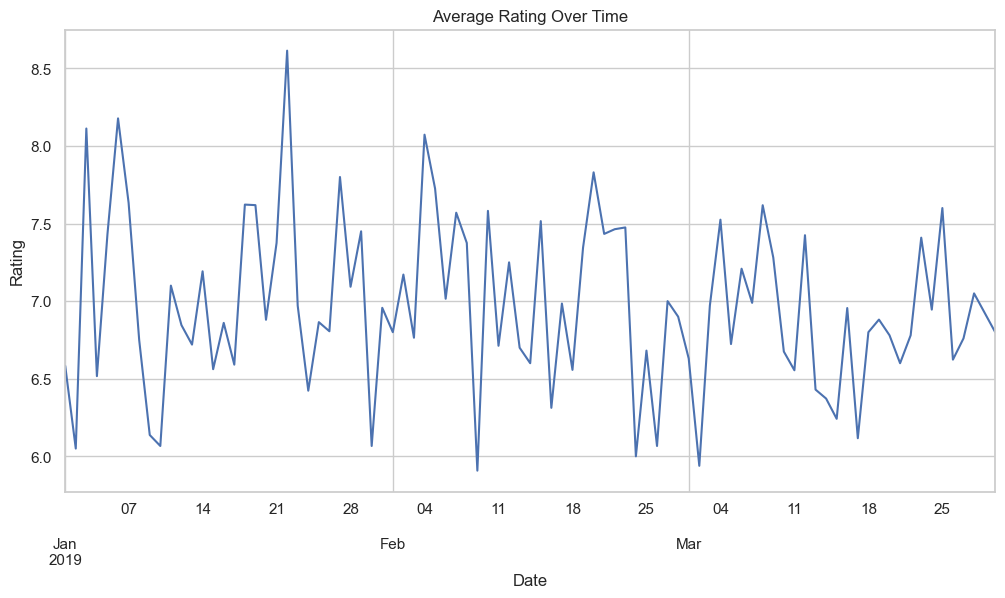

In [77]:
plt.figure(figsize=(12, 6))
df_clean.groupby("Date")["Rating"].mean().plot()
plt.title("Average Rating Over Time")
plt.ylabel("Rating")
plt.savefig("plots/rating_trends.png", dpi=300, bbox_inches="tight")
plt.show()


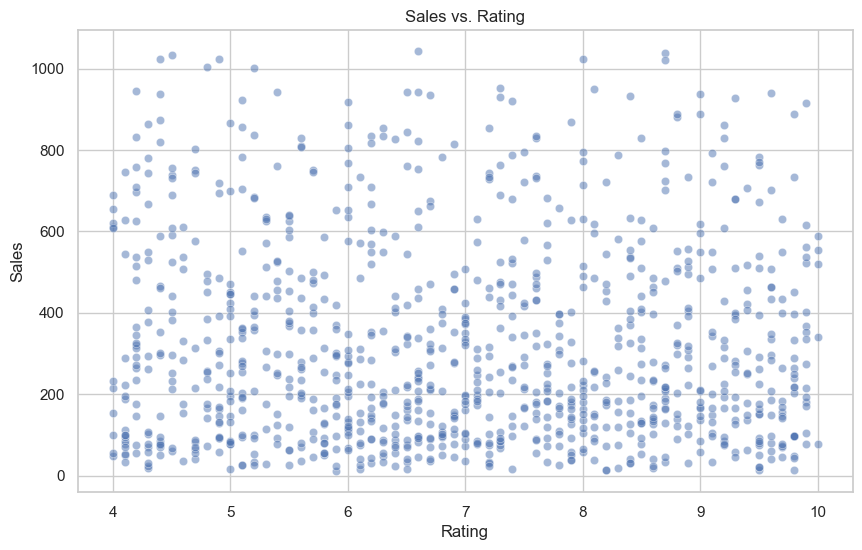

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Rating", y="Sales", data=df_clean, alpha=0.5)
plt.title("Sales vs. Rating")
plt.savefig("plots/sales_vs_rating.png", dpi=300, bbox_inches="tight")
plt.show()


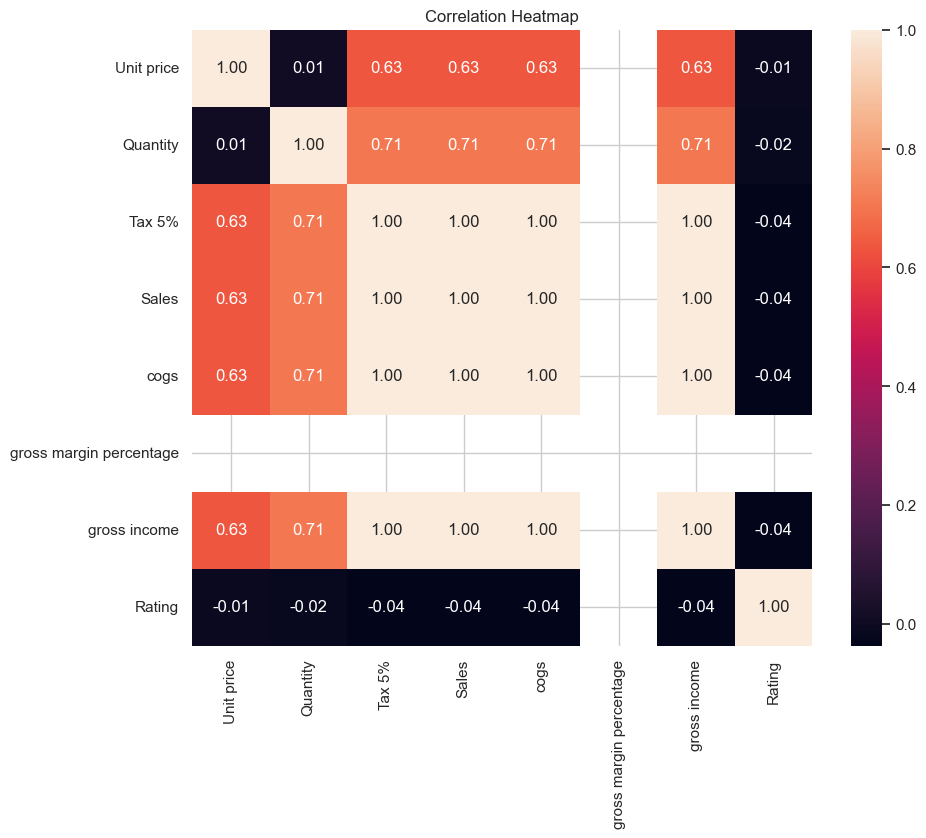

In [79]:
plt.figure(figsize=(10, 8))
numeric_df = df_clean.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("plots/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


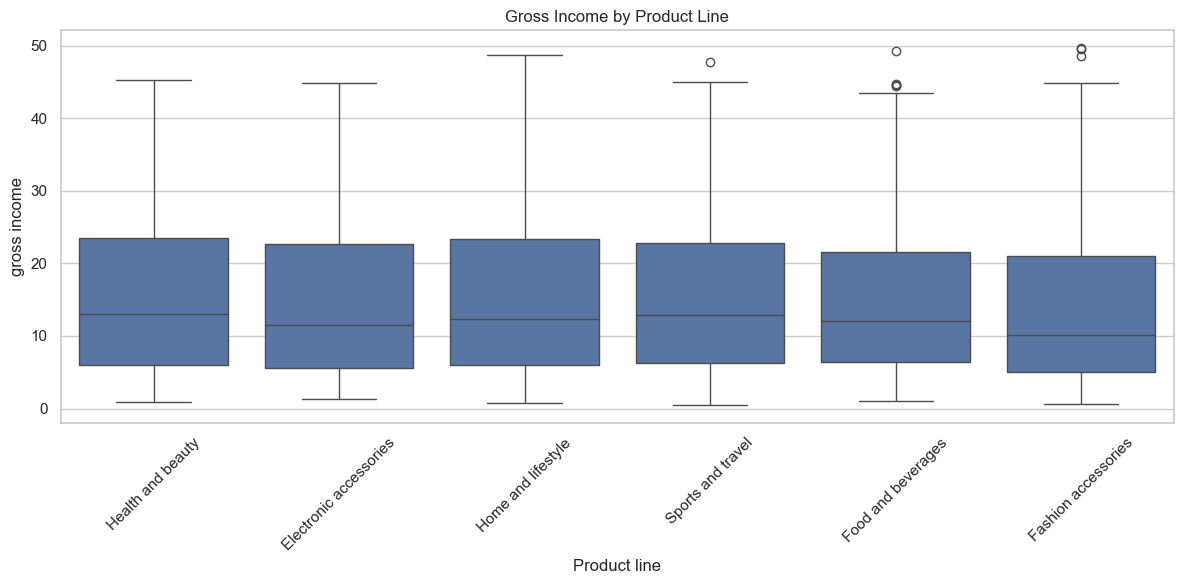


All plots saved to plots/


In [80]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Product line", y="gross income", data=df_clean)
plt.xticks(rotation=45)
plt.title("Gross Income by Product Line")
plt.tight_layout()
plt.savefig("plots/gross_income_by_product_line.png", dpi=300, bbox_inches="tight")
plt.show()
print("\nAll plots saved to plots/")


In [81]:
df_adv = pd.read_csv("cleaned_supermarket_sales.csv")

print("Advanced Questions Analysis")
branch_revenue = df_adv.groupby("Branch")["Sales"].sum().sort_values(ascending=False)
print("\nQ1: Revenue by Branch:")
print(branch_revenue)
top_branch = branch_revenue.index[0]
print(f"The branch with the highest revenue is: {top_branch}")

customer_spend = df_adv.groupby("Customer type")["Sales"].mean()
print("\nQ2: Average Spend by Customer Type:")
print(customer_spend)

payment_usage = df_adv["Payment"].value_counts()
print("\nQ3: Payment Method Usage:")
print(payment_usage)

product_rating = df_adv.groupby("Product line")["Rating"].mean().sort_values(ascending=False)
print("\nQ4: Average Rating by Product Line:")
print(product_rating)

correlation = df_adv["Unit price"].corr(df_adv["Quantity"])
print(f"\nQ5: Correlation between Unit Price and Quantity: {correlation:.4f}")

print("\n Additional Revenue Metrics")
total_revenue = df_adv["Sales"].sum()
total_gross_income = df_adv["gross income"].sum()
avg_tax = df_adv["Tax 5%"].mean()

print(f"Total Revenue: {total_revenue:.2f}")
print(f"Total Gross Income: {total_gross_income:.2f}")
print(f"Average Tax (5%): {avg_tax:.2f}")

product_line_stats = df_adv.groupby("Product line").agg({
    "Sales": "sum",
    "Quantity": "sum",
    "gross income": "mean"
}).sort_values(by="Sales", ascending=False)

print("\nProduct Line Statistics:")
display(product_line_stats)


Advanced Questions Analysis

Q1: Revenue by Branch:
Branch
Giza     110568.7065
Alex     106200.3705
Cairo    106197.6720
Name: Sales, dtype: float64
The branch with the highest revenue is: Giza

Q2: Average Spend by Customer Type:
Customer type
Member    335.742945
Normal    306.372379
Name: Sales, dtype: float64

Q3: Payment Method Usage:
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

Q4: Average Rating by Product Line:
Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64

Q5: Correlation between Unit Price and Quantity: 0.0108

 Additional Revenue Metrics
Total Revenue: 322966.75
Total Gross Income: 15379.37
Average Tax (5%): 15.38

Product Line Statistics:


,Sales,Quantity,gross income
Product line,,,
Food and beverages,56144.8440,952,15.365310
Sports and travel,55122.8265,920,15.812630
Electronic accessories,54337.5315,971,15.220597
Fashion accessories,54305.8950,902,14.528062
Home and lifestyle,53861.9130,911,16.030331
Health and beauty,49193.7390,854,15.411572
